# Signal processing based on Fourier-series

In this project, we will focus on numerical methods for signal processing based on Fourier series. Initially, we will consider the Fourier Transform of periodic functions and periodic signals. This project is part of the mandatory assignments in the course TMA4215 Numerical Mathematics, at NTNU Trondheim.

In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy.fft
from scipy.fft import fft, ifft
from numpy import genfromtxt
import sounddevice as sd
import soundfile as sf
import numpy.fft as fft

### Task 1: The (Discrete) Fourier Transform

## a)

Consider the functions $ e^{2\pi i k x} $, where $ k \in \mathbb{Z}, x \in \mathbb{T} $ , with $ \mathbb{T} = [0, 1) $. We want to prove the following:

$$ \langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle = 
\begin{cases} 
1 & \text{if } k = h \\
0 & \text{else}
\end{cases} $$

We plug our function into the inner product formula

$$
\langle f, g \rangle = \int_0^1 f(x)\overline{g(x)} \, dx,
$$

and take the complex conjugate, then simplify the exponentials:

$$ \langle e^{2\pi i k x}, e^{2\pi i h x} \rangle = \int_0^1 e^{2\pi i k x} \overline{e^{2\pi i h x}} \, dx = \int_0^1 e^{2\pi i k x} e^{-2\pi i h x} \, dx = \int_0^1 e^{2\pi i (k - h) x} \, dx $$


Now, we can evaluate the integral for $\bf{ k=h} $. The exponential term simplifies to $ e^{0} = 1 $, so the integral is:

$$ \int_0^1 1 \, dx = 1$$

For  $ \bf{k \neq h} $ , we need to integrate $ e^{2\pi i m x} $ where $ m \neq 0 $. Specifically:

$$ \int_0^1 e^{2\pi i m x} \, dx = \left[ \frac{e^{2\pi i m x}}{2\pi i m} \right]_0^1 = \frac{e^{2\pi i m} - 1}{2\pi i m} = 0, \text{ because } e^{2\pi i m} = 1 $$

To understand why $ e^{2\pi i m} = 1 $, we can use Euler's formula for the complex exponential function:

$$
e^{2\pi i m} = \cos(2\pi m) + i\sin(2\pi m) = 1 + i \cdot 0 = 1
$$

This holds for any integer $ m $, since both the sine and cosine functions are periodic with period $ 2\pi $ .



Therefore, the inner product is:

$$ \langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle = 
\begin{cases} 
1 & \text{if } k = h \\
0 & \text{else }
\end{cases} $$

## b) ##

We want to demonstrate that the set of functions $\sqrt{2} \text{sin}(2 \pi m x), m = 1, 2, ..., \text{cos}(2 \pi 0 x)$ and $\sqrt{2} \text{cos}(2 \pi n x), n = 1, 2, ..., x \in \mathbb{T}$ form an orthonormal system.

We have the following inner products:

1) 
$$
\langle \sqrt{2} \sin(2 \pi n \cdot), \sqrt{2} \cos(2 \pi m \cdot) \rangle = 0, \quad n \in \{1, 2, \dots\}, m \in \{ 0, 1, \dots \}
$$

2)
$$
\langle \sqrt{2} \sin(2 \pi n \cdot), \sqrt{2} \sin(2 \pi m \cdot) \rangle =
\begin{cases}
0, & m \neq n \\
1, & m = n
\end{cases}, \quad m, n \in \{ 0, 1, \dots\}
$$

3)
$$
\langle \sqrt{2} \cos(2 \pi n \cdot), \sqrt{2} \cos(2 \pi m \cdot) \rangle = 
\begin{cases}
0, & m \neq n \\
1, & m = n \neq 0\\
2, & m = n = 0
\end{cases}, \quad m, n \in \{ 0, 1, \dots\}.
$$

If we show that the equalities hold, we have demonstrated that the functions form an orthonormal system.



1) Consider the first inner product. When taking the complex conjugate of trigonometric functions, it affects only the argument, not the function itself, for example $\overline{\text{cos}(x)} = \text{cos}(\overline{x})$. So, we get

$$
\langle \sqrt{2} \sin(2\pi n \cdot), \sqrt{2} \cos(2\pi m \cdot) \rangle = \int_0^1 \sqrt{2} \sin(2\pi n x) \cdot \sqrt{2} \cos(2\pi m x) \, dx = 2 \int_0^1 \sin(2\pi n x) \cos(2\pi m x) \, dx
$$

Using a trigonometric identity $\sin(A)\cos(B) = \frac{1}{2} [\sin(A+B) + \sin(A-B)]$, we can rewrite the integral as

$$
\int_0^1 \left[\sin(2\pi (n+m) x) + \sin(2\pi (n-m) x)\right] \, dx
$$

Since the integral of a sine function over a full period $[0,1]$ is zero, we conclude that:

$$
\langle \sqrt{2} \sin(2\pi n \cdot), \sqrt{2} \cos(2\pi m \cdot) \rangle = 0.
$$









2) Consider the second inner product for $ \mathbf{m \neq n} $:

$$
\langle \sqrt{2} \sin(2\pi n \cdot), \sqrt{2} \sin(2\pi m \cdot) \rangle = \int_0^1 2 \sin(2\pi n x) \sin(2\pi m x) \, dx = \int_0^1 [\cos(2\pi (n - m) x) - \cos(2\pi (n + m) x)] \, dx.
$$

Where we have used the trigonometric identity $ \sin(A)\sin(B) = \frac{1}{2} [\cos(A-B) - \cos(A+B)]$.



$$
\begin{split}
\int_{0}^{1} \cos{2\pi(n-m)x} \,dx - \int_{0}^{1} \cos{2\pi(n+m)x} \,dx & 
= \left[ \frac{1}{2\pi (n-m)} \sin{2\pi (n-m)x} \right]_{0}^1 -  \left[ \frac{1}{2\pi (n+m)} \sin{2\pi (n+m)x} \right]_{0}^1 \\& = \frac{1}{2\pi (n-m)} \Big( \sin{2\pi (n-m)} - \sin{0} \Big) - \frac{1}{2\pi (n+m)} \Big( \sin{2\pi (n+m)} - \sin{0} \Big) \\
& = 0
\end{split}
$$

Since $\sin(2\pi k) = 0$ for any integer $k = n - m$ or $k = n + m$.


Consider the inner product for $\mathbf{m = n}$, and use the trigonometric identity $ 2\sin^2{x} = 1 - \cos{2x}$:

$$
\begin{split}
\langle \sqrt{2} \sin{2\pi n \cdot}, \sqrt{2} \sin{2\pi n \cdot}\rangle 
&= \int_{0}^{1} 2 \sin^2{2\pi nx} \,dx \\
&= \int_{0}^{1} \left(1 - \cos{4\pi nx}\right) \,dx \\
&= \int_{0}^{1} 1 \,dx - \int_{0}^{1} \cos{4\pi nx} \,dx \\
&= 1 - \frac{1}{4\pi n} \Big( \sin{4\pi n} - \sin{0} \Big) \\
&= 1
\end{split}
$$














3) Consider the third inner product


$$
\langle \sqrt{2} \cos(2\pi n \cdot), \sqrt{2} \cos(2\pi m \cdot) \rangle = \int_0^1 2 \cos(2\pi n x) \cos(2\pi m x) \, dx 
$$

For $ \mathbf{m \neq n} $ we get:

$$
\int_0^1 [\cos(2\pi (n - m) x) + \cos(2\pi (n + m) x)] \, dx.
$$

Where we have used that $ \cos(A)\cos(B) = \frac{1}{2} [\cos(A-B) + \cos(A+B)]$.

$$
\begin{split}
\int_{0}^{1} \cos{2\pi(n-m)x} \,dx + \int_{0}^{1} \cos{2\pi(n+m)x} \,dx & 
=  \left[ \frac{1}{2\pi (n-m)} \sin{2\pi (n-m)x} \right]_{0}^1 +  \left[ \frac{1}{2\pi (n+m)} \sin{2\pi (n+m)x} \right]_{0}^1 \\& = \frac{1}{2\pi (n-m)} \Big( \sin{2\pi (n-m)} - \sin{0} \Big) + \frac{1}{2\pi (n+m)} \Big( \sin{2\pi (n+m)} - \sin{0} \Big) \\
& = 0
\end{split}
$$




Thus, for $ \mathbf {n = m} $:


$$
\begin{split}
\langle \sqrt{2} \cos{2\pi n \cdot}, \sqrt{2} \cos{2\pi n \cdot}
\rangle & = \int_{0}^{1} 2\cos^2{2\pi nx} \,dx \\
\end{split}
$$

Using the trigonometric identity

$$
2\cos^2{x} = \cos{2x} + 1
$$

and we get

$$
\begin{split}
\int_{0}^{1} \cos{4\pi nx} + 1 \,dx & = \int_{0}^{1} \cos{4\pi nx}\,dx + \int_{0}^{1}1 \,dx \\
& = \frac{1}{4\pi n} \Big( \sin{4\pi n} - sin{0} \Big) + 1 \\
& = 1
\end{split}
$$


Lastly, we have for $ \mathbf {m = n = 0} $:

$$
\langle \sqrt{2} \cos{2\pi 0 \cdot}, \sqrt{2} \cos{2\pi 0 \cdot}
\rangle = 2 \int_{0}^{1} \cos^2{2\pi n0} \,dx
= 2 \int_{0}^{1} 1\,dx
= 2
$$



We have thus shown that all the equalities hold in all the cases we needed to demonstrate, which means that the functions form an orthonormal system.

## c) ##

We now aim to find orthonormal bases for the spaces $ T_n $ and $ S_n $ using the results from parts **a)** and **b)**.

The space $ T_n $ is defined as:

$$
T_n := \text{span}(\text{e}^{-2 \pi \text{i} n \cdot}, \dots, \text{e}^{2 \pi \text{i} n \cdot})
= \left\{ f \, \middle| \, f(x) = \sum_{k=-n}^{n} c_k \text{e}^{2 \pi \text{i} k x}, \, c_k \in \mathbb{C}, \, c_k = \overline{c_{-k}} \text{ for } k = 0, 1, \dots, n \right\},
$$

and the space $ S_n $ is defined as:

$$ S_n := \text{span}\left( \cos(0 \cdot), \cos(2 \pi \cdot), \dots, \cos(2 \pi n \cdot), \sin(2 \pi \cdot), \sin(2 \pi 2 \cdot), \dots, \sin(2 \pi n \cdot) \right), $$

$$
= \left\{ f \, \middle| \, f(x) = \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x), \, a_k, b_k \in \mathbb{R} \right\}.
$$

We will apply the Gram-Schmidt process to construct orthonormal bases for these spaces.

Starting with $ T_n $, we define:

$$
t_1 = \text{e}^{-2 \pi \text{i} n \cdot},
$$

$$
t_2 = \text{e}^{(-n + 1) 2 \pi \text{i} \cdot} - \frac{\langle \text{e}^{(-n + 1) 2 \pi \text{i} \cdot}, \text{e}^{-2 \pi \text{i} n \cdot} \rangle}{\langle \text{e}^{-2 \pi \text{i} n \cdot}, \text{e}^{-2 \pi \text{i} n \cdot} \rangle} \text{e}^{-2 \pi \text{i} n \cdot}.
$$

We know from part **a)** that $\langle e^{2\pi i k \cdot}, e^{2\pi i h \cdot} \rangle = 0$, for $ k \neq h $. This means that the inner product between two different exponential functions is zero. This implies that each projection in the Gram-Schmidt process will be zero. Therefore, the basis is already orthonormal. The orthonormal basis for $ T_n $ is then:

$$
B_{T_n} = \left\{ \text{e}^{2 \pi \text{i} k \cdot}, \, k = -n, -n + 1, \dots, n \right\}.
$$


Next, we find $S_n$ with Gram-Schmidt:

$$
s_1 = \cos(0 \cdot),
$$

$$
s_2 = \cos(2 \pi \cdot) - \frac{\langle \cos(2 \pi \cdot), \cos(0 \cdot) \rangle}{\langle \cos(0 \cdot), \cos(0 \cdot) \rangle} \cos(0 \cdot).
$$

From part **b)**, we already know that the inner product between sine and cosine  with $ m \neq n $ is zero: 

$$
\langle \cos(2\pi m x), \sin(2\pi n x) \rangle = 0 \quad \text{for all} \, m, n
$$

$$
\langle \cos(2\pi m x), \cos(2\pi n x) \rangle = 0 \quad \text{for} \, m \neq n
$$

$$
\langle \sin(2\pi m x), \sin(2\pi n x) \rangle = 0 \quad \text{for} \, m \neq n
$$

Therefore, all projections in the Gram-Schmidt process vanish. 

From part **b)**, we also know that for orthogonality, the functions 
$\cos(2 \pi k x)$ and $\sin(2 \pi k x)$ for $k \neq 0$ 
need to be multiplied by $\sqrt{2}$ to normalize them. However, 
$\cos(0 \cdot)$ is already normalized since its inner product over $[0, 1]$ is 1.

Hence, the orthonormal basis for $ S_n $ is:

$$
B_{S_n} = \left\{ \cos(0 \cdot), \, \sqrt{2} \cos(2 \pi k \cdot), \, \sqrt{2} \sin(2 \pi k \cdot), \, k = 1, 2, \dots, n \right\}.
$$

Eulers identity, given by $e^{ik} = \cos(k) + i \sin(k)$, allows us to express the orthonormal basis of $T_n$ as:

$$
T_{n}:= \text{span}(e^{-2\pi i h \cdot}, \ldots, e^{2\pi i h \cdot}) = 
\left\{
f(x) = \sum_{h=-n}^{n} c_h e^{2\pi i h x}, \,  \, c_{-n}, c_{-n+1}, \ldots, c_n \in \mathbb{C}
\right\}
$$

which can also be rewritten as:

$$
\left\{
f(x) = \sum_{h=-n}^{n} c_h( \cos(2\pi h \cdot) + i\sin(2\pi h \cdot)), \, \, c_{-n}, c_{-n+1}, \ldots, c_n \in \mathbb{C}
\right\}
$$

Considering the condition

$$ c_h = \overline{c_{-h}}, \quad h = 0, \ldots, n, $$

This means that for $ h \neq 0 $, the coefficients are symmetric, where $ c_{-h} $ is the complex conjugate of $ c_h $:

$$
c_{-k} = \overline{c_k}
$$

We can use this to rewrite the sum:

$$ \sum_{h=0}^{n} \overline{c_h} (\cos(2\pi (-h)x) + i\sin(2\pi (-h)x)) + \sum_{h=0}^{n} c_h(\cos(2\pi hx) + i\sin(2\pi hx))
$$

$$ = \sum_{h=0}^{n} \overline{c_h} (\cos(2\pi hx) - i\sin(2\pi hx)) + \sum_{h=0}^{n} c_h(\cos(2\pi hx) + i\sin(2\pi hx))
$$

$$ = \sum_{h=0}^{n} \cos(2\pi hx)(c_h + \overline{c_h}) + i\sin(2\pi hx)(c_h - \overline{c_h})
$$

Since $ c_h + \overline{c_h} $ is real (the sum of a complex coefficient and its conjugate is real), and $ i(c_h - \overline{c_h}) $ is also real, we can now combine this into The Fourier series with real coefficients. Denoting $\frac{a_0}{2}$ as the constant term, the resulting sum is:

$$ \frac{a_0}{2} + \sum_{h=0}^{n} a_n\cos(2\pi hx) + b_n\sin(2\pi hx), \, \text{where} \, a_0, a_1, \ldots, a_n, b_1, \ldots, b_n \in \mathbb{R}
$$

The Fourier series is simply a way to express a function as a linear combination of trigonometric basis functions, as we have in $S_n$. Therefore, $ T_n $ and $ S_n $ span the same space:

$$ T_n := \text{span}(\text{e}^{-2 \pi \text{i} n \cdot}, ..., \text{e}^{2 \pi \text{i} n}) 
= \text{span}(\text{cos}(0 \cdot), \text{cos}(2 \pi \cdot), ..., \text{cos}(2 \pi n \cdot), \text{sin}(2 \pi \cdot), \text{sin}(2 \pi 2 \cdot), ..., \text{sin}(2 \pi n \cdot))) := S_n $$

Finally, the dimension of $ T_n $ and $ S_n$ is $ 2n + 1 $, which corresponds to the $ n $ cosine and $ n $ sine functions, plus the constant $ \cos(0 \cdot) $.

## d) ##

We aim to show that the Fourier coefficients $ a_0, a_1, \dots, a_n, b_1, \dots, b_n $ for any function $ f \in S_n $ can be determined as follows:

$$
a_k(f) = 2 \langle f, \cos(2 \pi k \cdot) \rangle = 2 \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \cos(2 \pi k x) \, dx, \quad k = 0, 1, \dots
$$

$$
b_k(f) = 2 \langle f, \sin(2 \pi k \cdot) \rangle = 2 \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \sin(2 \pi k x) \, dx, \quad k = 1,2, \dots
$$

Given the representation of functions in $ S_n $ as:

$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x),
$$

we will now compute the inner products to find $ a_k(f) $ and $ b_k(f) $.




#### First statement:

$$
2 \langle f, \text{cos}(2 \pi n \cdot) \rangle 
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} f(x) \text{cos}(2 \pi n x) dx $$

$$
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} (\frac{a_0}{2} + \sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x) + b_k \text{sin}(2 \pi k x)) \text{cos}(2 \pi n x)  dx
$$

$$
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} (\frac{a_0}{2}\text{cos}(2 \pi n x) + \text{cos}(2 \pi n x)\sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x) + b_k \text{sin}(2 \pi k x)) dx $$

$$
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} (\frac{a_0}{2}\text{cos}(2 \pi n x) + \sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x)\text{cos}(2 \pi n x) + b_k \text{sin}(2 \pi k x)\text{cos}(2 \pi n x)) dx $$

$$
= 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} \frac{a_0}{2}\text{cos}(2 \pi n x) dx + 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} a_k \text{cos}(2 \pi k x)\text{cos}(2 \pi n x) dx + 2 \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} b_k \text{sin}(2 \pi k x)\text{cos}(2 \pi n x)) dx $$

$$
= \int^{\frac{1}{2}}_{-\frac{1}{2}} a_0 \text{cos}(2 \pi n x) dx + \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} a_k \sqrt{2} \text{cos}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x) dx + \int^{\frac{1}{2}}_{-\frac{1}{2}} \sum^{n}_{k = 1} b_k \sqrt{2}\text{sin}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x)) dx $$

From part **b)**, we know that 

$$\sqrt{2} \text{cos}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x) = 1 \text{ for }  k = n $$

$$ \sqrt{2} \text{cos}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x) = 0 \text{ for }  k \neq n $$ 

$$\sqrt{2} \text{sin}(2 \pi k x) \sqrt{2}\text{cos}(2 \pi n x)) = 0 \text{ for all } k, n $$ 


Therefore, the expression simplifies to:

$$
a_0 \left[ \frac{\sin(2 \pi k x)}{2 \pi k} \right]_{-\frac{1}{2}}^{\frac{1}{2}} + a_k \int_{-\frac{1}{2}}^{\frac{1}{2}} dx = a_k(1),
$$

so the final result for $ a_k(f) $ is:

$$
a_k(f) = a_k.
$$

#### Second statement:

Much of the same approach is used in this proof.

$$
2 \langle f, \sin(2 \pi k \cdot) \rangle = 2 \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \sin(2 \pi k x) \, dx.
$$

Substitute the expansion of $ f(x) $

$$
2 \int_{-\frac{1}{2}}^{\frac{1}{2}} \left( \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos(2 \pi k x) + b_k \sin(2 \pi k x) \right) \sin(2 \pi n x) \, dx.
$$

Expanding this

$$
2 \int_{-\frac{1}{2}}^{\frac{1}{2}} \left( \frac{a_0}{2} \sin(2 \pi n x) + \sum_{k=1}^{n} a_k \cos(2 \pi k x) \sin(2 \pi n x) + \sum_{k=1}^{n} b_k \sin(2 \pi k x) \sin(2 \pi n x) \right) \ dx
$$

Again, using the results from part **b)**, 

$$\sqrt{2} \text{sin}(2 \pi k x) \text{sin}(2 \pi n x) = 1 \text{ for } k = n$$

$$\sqrt{2} \text{sin}(2 \pi k x) \text{sin}(2 \pi n x) = 0 \text{ for } k \neq n$$ 

$$\sqrt{2} \text{cos}(2 \pi k x) \sqrt{2} \text{sin}(2 \pi n x) = 0 \text{ for all } k, n$$

Therefore, the simplified result is

$$
a_0 \left[ -\frac{\cos(2 \pi n x)}{2 \pi n} \right]_{-\frac{1}{2}}^{\frac{1}{2}} + b_k \int_{-\frac{1}{2}}^{\frac{1}{2}} dx = b_k(1),
$$

so we obtain

$$
b_k(f) = b_k
$$

Thus, we have shown that the Fourier coefficients $ a_k $ and $ b_k $ for a function $ f \in S_n $ can be computed as required.

## e)

We will now approximate the Fourier coefficients $ c_k(f) $ of a function $ f $ using equidistant points $ x_0, x_1, \dots, x_{N-1}, x_j $, where $ x_j = \frac{j}{N} $, for $ j = 0, \dots, N $, and $ N \in \mathbb{N} $. These points allow us to discretize the integral for the Fourier coefficients, given by:

$$
c_k(f) = \langle f, \text{e}^{2 \pi \text{i} k \cdot} \rangle = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \text{e}^{-2 \pi \text{i} k x} \, dx, \quad k = -n, \dots, n.
$$

We approximate this integral using the composite trapezoidal rule, yielding:

$$
c_k(f) \approx \hat{f_k} := \frac{1}{N} \sum_{j=0}^{N-1} f_j \text{e}^{-2 \pi \text{i} j k /N},
$$
where $ f_j = f(x_j) $ and $ \vec{f} = (f_0, \dots, f_{N-1}) $.

The composite trapezoidal rule for integration is given by:

$$
\int_a^b f(x) \, dx \approx \frac{1}{2} \sum_{j=1}^{n} (x_j - x_{j-1}) \Big[ f(x_{j-1}) + f(x_j) \Big].
$$

Applying this rule to our case, we approximate the Fourier coefficient:

$$
c_k(f) = \int_{-\frac{1}{2}}^{\frac{1}{2}} f(x) \text{e}^{-2 \pi \text{i} k x} \, dx 
\approx \frac{1}{2} \sum_{j=1}^{n} (x_j - x_{j-1}) \Big[ f(x_{j-1}) \text{e}^{-2 \pi \text{i} k x_{j-1}} + f(x_j) \text{e}^{-2 \pi \text{i} k x_j} \Big] = \frac{1}{2} \sum^n_{j = 1} (\frac{j}{N} - \frac{j - 1}{N}) \Big[ f_{j - 1}\text{e}^{-2 \pi \text{i} k x_{j - 1}} + f_j\text{e}^{-2 \pi \text{i} k x_j}) \Big]
$$

Simplify, factoring out $ \frac{1}{2N} $ and rewriting the sum:

$$
c_k(f) \approx \frac{1}{2} \sum^n_{j = 1} \frac{1}{N} \Big[ g_{j-1} + g_j \Big] = \frac{1}{2N} \left( g_0 + g_1 + \dots + g_{N-1} + g_1 + \dots + g_N \right),
$$

This expression becomes:

$$
\frac{1}{2N} \left( g_0 + 2g_1 + 2g_2 + \dots + 2g_{N-1} + g_N \right).
$$

We know that $ g_j = f_j \text{e}^{-2 \pi \text{i} k x_j} $. We also know that $ f_j $ is periodic, so $ g_0 = g_N $, and the formula simplifies to:

$$
\frac{1}{N} \sum_{j=0}^{N-1} g_j = \frac{1}{N} \sum_{j=0}^{N-1} f_j \text{e}^{-2 \pi \text{i} j k /N}.
$$

This is the desired approximation.

#### Periodicity of $ \hat{f_k} $:

Now, let's demonstrate that $ \hat{f_k} $ is periodic with period $ N $, meaning that $ \hat{f_k} = \hat{f_{k+N}} $ for any $ k \in \mathbb{Z} $.

We compute:

$$
\hat{f_{k+N}} = \frac{1}{N} \sum_{j=0}^{N-1} f_j \text{e}^{-2 \pi \text{i} j (k+N) /N} 
= \frac{1}{N} \sum_{j=0}^{N-1} f_j \text{e}^{-2 \pi \text{i} j k /N} \text{e}^{-2 \pi \text{i} j}.
$$

Since $ \text{e}^{-2 \pi \text{i} j} = 1 $ for any integer $ j $, we have:

$$
\hat{f_k} = \hat{f_{k+N}} \quad \text{for all } k \in \mathbb{Z}.
$$

Thus, the values $ \hat{f_k} $ are periodic with period $ N $, meaning that we only need to compute the values for one period, as they will repeat for each subsequent period.

## f)

Want to prove that

$$
\frac{1}{N} \sum_{j=0}^{N-1} \text{e}^{- 2 \pi i j k/N} = 
\begin{cases} 
1, & k \mod N \equiv 0 \\
0, & \text{otherwise}
\end{cases}
$$

#### The first case:  $ k\mod N \equiv 0 $

In this case, $ \frac{k}{N} $ is an integer, we call $ n $.

$$ \frac{1}{N} \sum_{j=0}^{N-1} \text{e}^{- 2 \pi i j n} = \frac{1}{N} \left( \text{e}^{- 2 \pi i \cdot 0 \cdot n} + \dots + \text{e}^{- 2 \pi i \cdot (N-1) \cdot n} \right)$$

Since $ \text{e}^{- 2 \pi i j n} = 1 $ for any integer $ n $, this becomes:

$$ \frac{1}{N} (1 + 1 + \dots + 1) = \frac{1}{N} \cdot N = 1$$

#### The second case: $ k \mod N \neq 0 $

If $ k \mod N \neq 0 $, then we need to rewrite the sum as a geometric series:

$$ \frac{1}{N} \sum_{j=0}^{N-1} \text{e}^{- 2 \pi i j k / N} $$

This is a geometric series with the ratio $ r = \text{e}^{- 2 \pi i k / N} $. The sum of a finite geometric series can be expressed as

$$ S = \frac{1 - r^N}{1 - r} $$

So the sum becomes

$$ S_N = \frac{1}{N} \frac{1 - \text{e}^{- 2 \pi i k}}{1 - \text{e}^{- 2 \pi i k / N}}$$

Since $ \text{e}^{- 2 \pi i k} = 1 $ when $ k $ is not a multiple of $ N $, the numerator is zero:

$$ S_N = \frac{1}{N} \cdot 0 = 0 $$

Thus, we have proved both cases.

## g)

The discrete Fourier transform matrix is given by:

$$
\mathcal{F}_N = \left( \text{e}^{-2 \pi i k l / N} \right)_{k,l=0}^{N-1}
$$

We need to show that the inverse matrix $ \mathcal{F}_N^{-1} $ is a scaled version of the complex conjugate of $ \mathcal{F}_N $ :

$$
\overline{\mathcal{F}_N} = \left( \text{e}^{+2 \pi i k l / N} \right)_{k,l=0}^{N-1}
$$

To demonstrate this, we can utilize the fact that $ \mathcal{F}_N \cdot \mathcal{F}_N^{-1} = I_N $, where $ I_N $ is the identity matrix.

We therefore solve the product $ \mathcal{F}_N \cdot \overline{\mathcal{F}_N} $, and expect to obtain the result $ m  I_N $, for some scalar $m$.

$$
\left( \mathcal{F}_N \cdot \overline{\mathcal{F}_N} \right)_{k,l} = \sum_{m=0}^{N-1} \text{e}^{-2 \pi i k m / N} \text{e}^{+2 \pi i l m / N} = \sum_{m=0}^{N-1} \text{e}^{2 \pi i (l-k) m / N}
$$


For $ l = k $, the sum becomes $ N $, as all terms are equal to 1. 

For $ l \neq k $, the terms form a geometric series. We rewrite the sum as a geometric series with the common ratio $ r = \text{e}^{2 \pi i (l-k) / N} $:

$$
S = \sum_{m=0}^{N-1} \left( \text{e}^{2 \pi i (l-k) / N} \right)^m
$$

The sum of a finite geometric series can be expressed as:

$$
S = \frac{1 - r^N}{1 - r} = \frac{1 - 1}{1 - r} = 0
$$

since $ r^N = \left( \text{e}^{2 \pi i (l-k) / N} \right)^N = \text{e}^{2 \pi i (l-k)} = 1 $, because $ l-k $ is an integer. Therfore, when $ l \neq k $, the sum of the terms is zero. 

Since all the terms are equal to $1$ for $ l = k $, and zero for $ l \neq k $, we get the identity matrix and a scalar as expected:

$$
\mathcal{F}_N \cdot \overline{\mathcal{F}_N} = N I_N
$$

We know that $ \mathcal{F}_N \cdot \mathcal{F}_N^{-1} = I_N $, so the inverse of $ \mathcal{F}_N $ is:

$$
\mathcal{F}_N^{-1} = \frac{1}{N} \overline{\mathcal{F}_N}
$$




Mathematicans might like the scaled version $\frac{1}{\sqrt N}$ better because the inverse of this scaled matrix becomes $ \frac{1}{\sqrt{N}} \overline{\mathcal{F}_N} $, where the scaling factor $ \frac{1}{\sqrt{N}} $ is applied in both the forward and inverse transforms. This creates a nice symmetry between the forward and inverse operations:
$$
\left( \frac{1}{\sqrt{N}} \mathcal{F}_N \right)^{-1} = \frac{1}{\sqrt{N}} \overline{\mathcal{F}_N}
$$

## h)

We are given a vector $ \mathbf{a} = (a_0, a_1, \dots, a_{N-1})^T $, and the circulant matrix $ \text{circ}(\mathbf{a}) $ is defined as:

$$
\text{circ}(\mathbf{a}) = 
\begin{pmatrix}
a_0 & a_{N-1} & \cdots & a_1 \\
a_1 & a_0 & \cdots & a_2 \\
\vdots & \vdots & \ddots & \vdots \\
a_{N-1} & a_{N-2} & \cdots & a_0
\end{pmatrix}
$$

We want to prove that the Fourier matrix $ F_N $ diagonalizes this circulant matrix, that is:

$$
\text{circ}(\mathbf{a}) = F_N^{-1} \text{diag}(\hat{\mathbf{a}}) F_N
$$

where $ \hat{\mathbf{a}} = F_N \mathbf{a} $, and $ \text{diag}(\hat{\mathbf{a}}) $ is a diagonal matrix where the elements of $ \hat{\mathbf{a}} $ are placed on the diagonal.


We know from part **g)** that we can write 
$$
\text{circ}(\mathbf{a}) = F_N^{-1} \text{diag}(\hat{\mathbf{a}}) F_N = \frac{1}{N}\overline{F_N} \text{diag}(\hat{\mathbf{a}}) F_N
$$

From the hint, we begin by considering a single entry of the result from the matrix product on the right.




$$
\begin{bmatrix}
e^{2\pi i \cdot 0 \cdot 0/N} & e^{2\pi i \cdot 0 \cdot 1/N} & \cdots & e^{2\pi i \cdot 0 \cdot (N-1)/N} \\
e^{2\pi i \cdot 1 \cdot 0/N} & e^{2\pi i \cdot 1 \cdot 1/N} & \cdots & e^{2\pi i \cdot 1 \cdot (N-1)/N} \\
\vdots & \vdots & \ddots & \vdots \\
e^{2\pi i \cdot (N-1) \cdot 0/N} & e^{2\pi i \cdot (N-1) \cdot 1/N} & \cdots & e^{2\pi i \cdot (N-1) \cdot (N-1)/N} 
\end{bmatrix}
\begin{bmatrix}
\hat{a}_0 e^{-2\pi i \cdot 0 \cdot 0/N} & \hat{a}_0 e^{-2\pi i \cdot 0 \cdot 1/N} & \cdots & \hat{a}_0 e^{-2\pi i \cdot 0 \cdot (N-1)/N} \\
\hat{a}_1 e^{-2\pi i \cdot 1 \cdot 0/N} & \hat{a}_1 e^{-2\pi i \cdot 1 \cdot 1/N} & \cdots & \hat{a}_1 e^{-2\pi i \cdot 1 \cdot (N-1)/N} \\
\vdots & \vdots & \ddots & \vdots \\
\hat{a}_{N-1} e^{-2\pi i \cdot (N-1) \cdot 0/N} & \hat{a}_{N-1} e^{-2\pi i \cdot (N-1) \cdot 1/N} & \cdots & \hat{a}_{N-1} e^{-2\pi i \cdot (N-1) \cdot (N-1)/N} \\
\end{bmatrix}
$$




Now, let’s focus on a specific entry $k = 1$ and $l = 0$. We introduce distinct indices for rows and columns for clarity:

$$
\begin{split}
\sum_{s=0}^{N-1} e^{2\pi i \cdot 1 \cdot s \frac{1}{N}} \hat{a}_s e^{2\pi i \cdot s \cdot 0 \frac{1}{N}} &= \sum_{s=0}^{N-1} e^{2\pi i \cdot 1 \cdot s \frac{1}{N}} \hat{a}_s \\
&= \sum_{s=0}^{N-1} \sum_{p=0}^{N-1} e^{2\pi i \cdot 1 \cdot s \frac{1}{N}} e^{2\pi i \cdot p \cdot s \frac{1}{N}} a_p \\
&= \sum_{s=0}^{N-1} \sum_{p=0}^{N-1} e^{\frac{2\pi i s}{N}(1-p)} a_p \\
&= 
\begin{cases}
a_1 \quad \text{if} \quad p=1 \\
0 \quad \text{otherwise}
\end{cases}
\end{split}
$$



Doing the same for $k = 0$ and $l = 1$:

$$
\begin{split}
\sum_{s=0}^{N-1} e^{2\pi i \cdot 0 \cdot s \frac{1}{N}} e^{-2\pi i \cdot s \cdot 1 \frac{1}{N}} \hat{a}_s &= \sum_{s=0}^{N-1} e^{-2\pi i \cdot s \cdot 1 \frac{1}{N}} \hat{a}_s \\
&= \sum_{s=0}^{N-1} \sum_{p=0}^{N-1} e^{-2\pi i \cdot s \cdot 1 \frac{1}{N}} e^{-2\pi i \cdot s \cdot p \frac{1}{N}} a_p \\
&= \sum_{s=0}^{N-1} \sum_{p=0}^{N-1} e^{\frac{-2\pi i s}{N}(1+p)} a_p
\end{split}
$$

In this case, the only non-zero contribution occurs when $(1 + p) \mod N \equiv 0$. Since $p \neq 0$, we require $1 + p = N \implies p = N-1$. Hence, we get:

$$
\sum_{s=0}^{N-1} e^{2\pi i \cdot 0 \cdot s \frac{1}{N}} e^{-2\pi i \cdot s \cdot 1 \frac{1}{N}} \hat{a}_s = 
\begin{cases}
a_{N-1} \quad \text{if} \quad p = N-1 \\
0 \quad \text{otherwise}
\end{cases}
$$

We have now shown that the equality holds for two elements. Repeating this process for each element shows that $ \text{circ}(\mathbf{a}) = F_N^{-1} \text{diag}(\hat{\mathbf{a}}) F_N $. This completes the proof.

## i)

We define a function $\text{transform}(f, N, \text{start} = 0.0)$ where $f$ is a function, $N$ represents the number of samples, and $\text{start}$ specifies the initial point of sampling. This function returns a vector $\vec{f} = (f_0, \dots, f_{N - 1})^T$ consisting of the function values. We then proceed to compute the Discrete Fourier Transform (DFT) $\hat{\vec{f}}$ of the vector $\vec{f}$ using $\text{scipy.fft.fft}$.

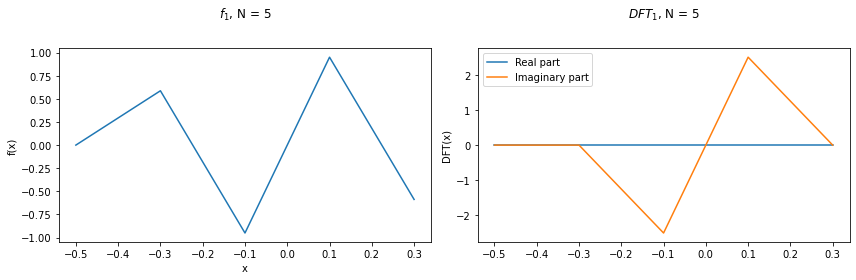

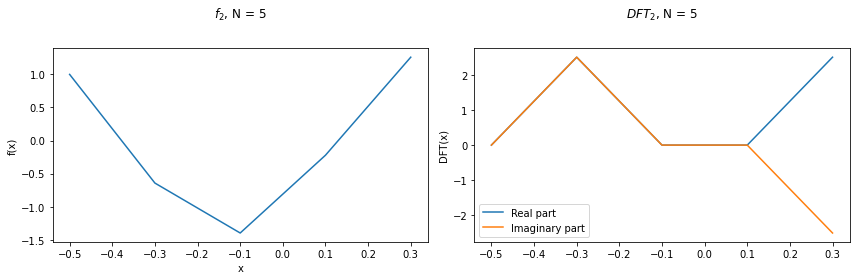

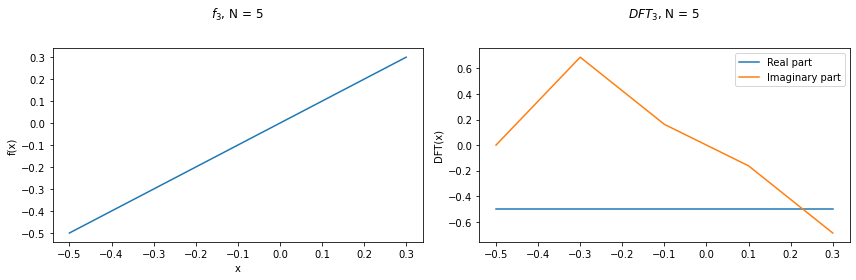

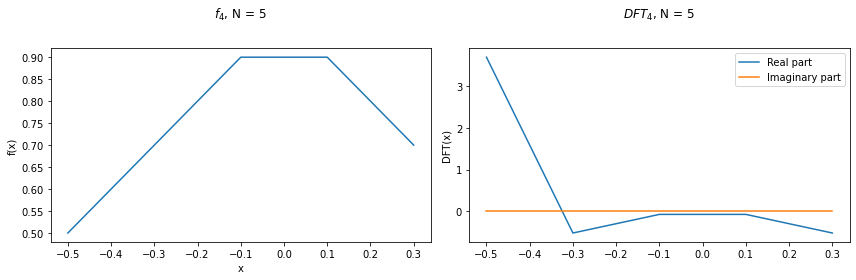

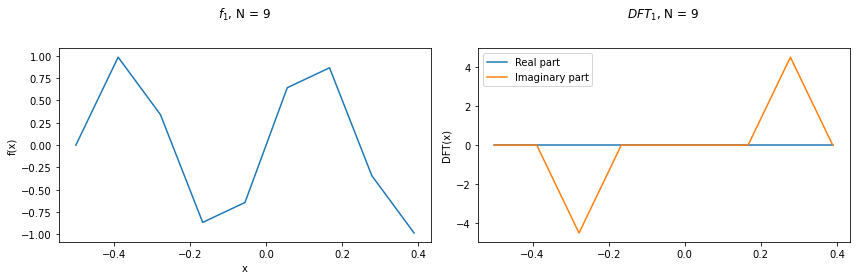

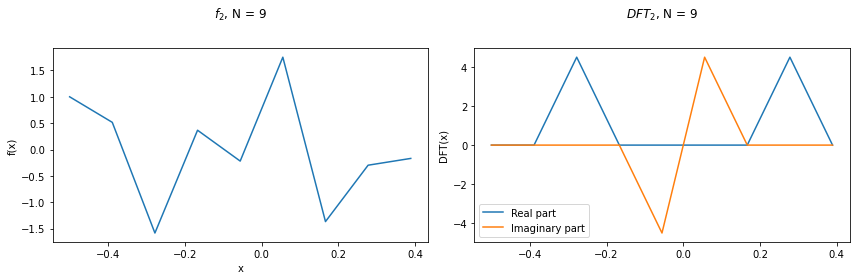

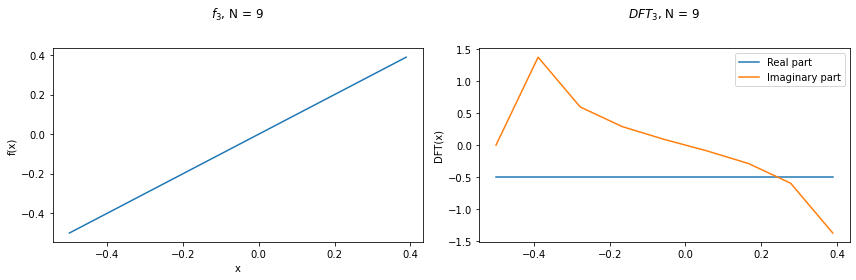

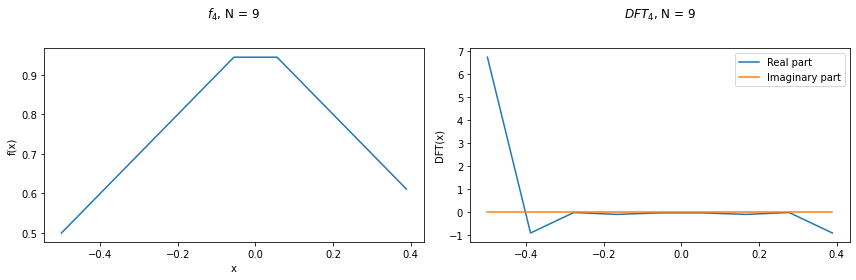

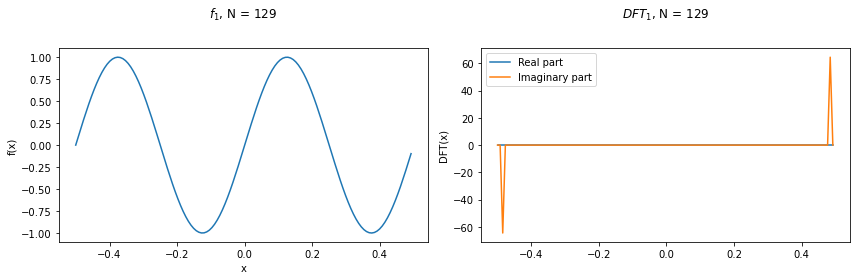

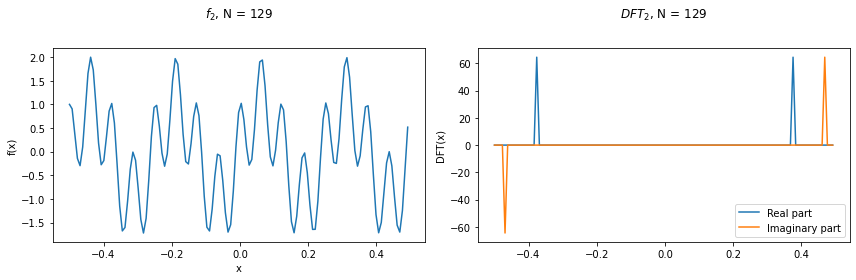

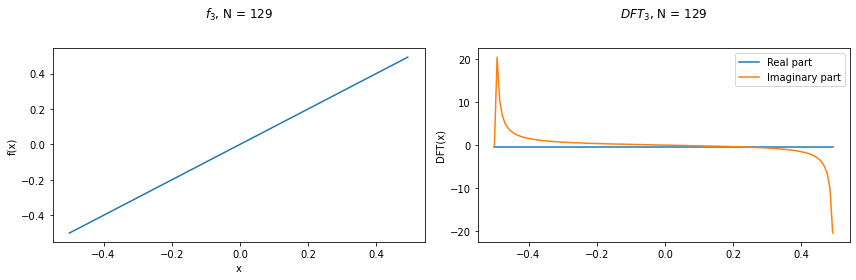

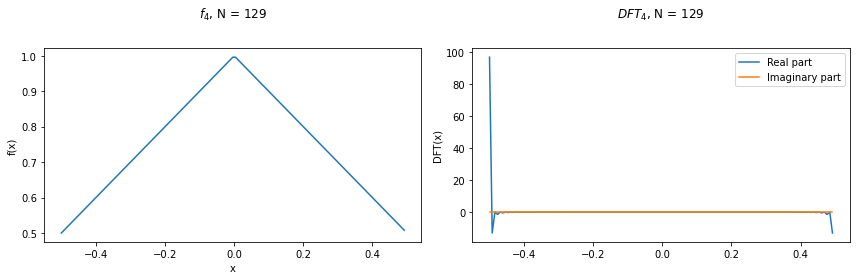

In [81]:
# Define the given functions

def func_1(x):
    return math.sin(4 * math.pi * x)

def func_2(x):
    return math.sin(8 * math.pi * x) + math.cos(32 * math.pi * x)

def func_3(x):
    return x

def func_4(x):
    return 1 - abs(x)


# Define the transformation function
def transform(func, N, start=0.0):
    """
    Transforms a function into a vector of function values
    
    Input:
    func - the function to be sampled
    N - number of samples
    start - the starting point for sampling
    
    Output:
    f_values - the vector of function values
    x_values - the vector of x values
    """
    f_values = np.zeros(N)
    x_values = np.linspace(start, start + 1, N, endpoint=False)

    for i in range(N):
        f_values[i] = func(x_values[i])

    return f_values, x_values

# Define DFT function
def compute_DFT(f_values):
    """
    Computes the Discrete Fourier Transform (DFT) of a vector of function values
    
    Input:
    f_values - the vector of function values
    
    Output:
    scipy.fft.fft(f_values) - the DFT
    """
    return scipy.fft.fft(f_values)


# Define the plotting function
def plot_function_and_dft(func, N, n):
    """
    Plots the vector of function values and its DFT side by side
    
    Input:
    func - the function to be transformed
    N - number of samples
    n - the function number (for labeling)
    """
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(transform(func, N, -0.5)[1], transform(func, N, -0.5)[0])
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"$f_{n}$, N = {N}", pad=30)

    plt.subplot(1, 2, 2)
    # Plotting the real and imaginary parts of the DFT in the same plot
    plt.plot(transform(func, N, -0.5)[1], np.real(compute_DFT(transform(func, N, -0.5)[0])), label='Real part')
    plt.plot(transform(func, N, -0.5)[1], np.imag(compute_DFT(transform(func, N, -0.5)[0])), label='Imaginary part')
    plt.legend()
    plt.ylabel('DFT(x)')
    plt.title(f"$DFT_{n}$, N = {N}", pad=30)
    
    plt.tight_layout()
    plt.show()

# Set sample sizes
sample_sizes = np.array([5, 9, 129])

# Plot functions and DFT for each function and sample size
for i in range(3):
    plot_function_and_dft(func_1, sample_sizes[i], 1)
    plot_function_and_dft(func_2, sample_sizes[i], 2)
    plot_function_and_dft(func_3, sample_sizes[i], 3)
    plot_function_and_dft(func_4, sample_sizes[i], 4)

$f$ always approximates $\hat{f}$ well for large $N$. 

However, $f_3(x)$ is approximated well for all values of $N$. The likely reason is that it’s a simple, linear function.

## j)

We plot the discrete Fourier coefficients $\hat{\vec{f}}$ after applying $\text{fftshift}$ to $f_2(x)$ from part **i)**.

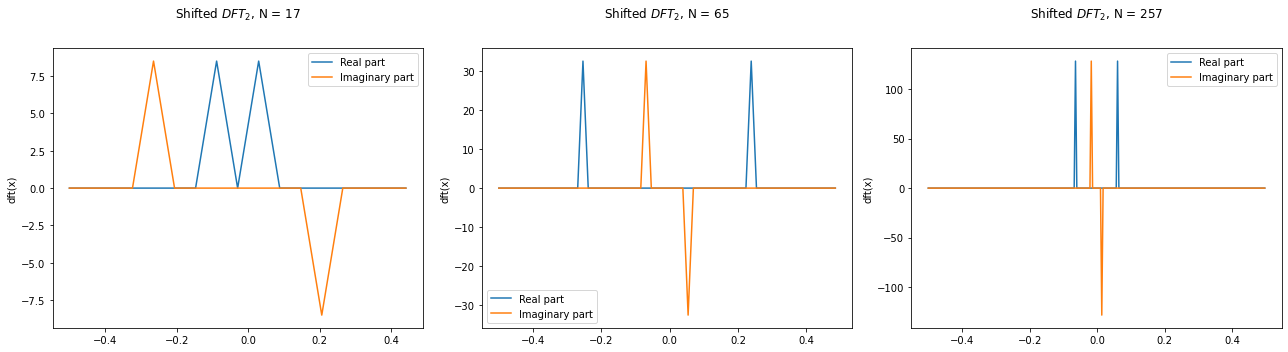

In [94]:
N = np.array([17, 65, 257])

plt.figure(figsize = (18, 5))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    # Plotting the real and imaginary parts in the same plot using different colors
    plt.plot(transform(func_2, N[i - 1], -0.5)[1], np.fft.fftshift(np.real(compute_DFT(transform(func_2, N[i - 1], -0.5)[0]))), label='Real part') 
    plt.plot(transform(func_2, N[i - 1], -0.5)[1], np.fft.fftshift(np.imag(compute_DFT(transform(func_2, N[i - 1], -0.5)[0]))), label ='Imaginary part')
    plt.legend()
    plt.ylabel('dft(x)')
    plt.title(f"Shifted $DFT_{2}$, N = {N[i - 1]}", pad = 30)
    

plt.tight_layout()
    
plt.show()

We want to state $a_k(f_2)$ and $b_k(f_2)$ without explicitly solving the integral. We have the formula for Fourier series

$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{n} a_k \cos{(2\pi kx)} + b_k\sin{(2\pi kx)}
$$

and 
$$
f_2(x) = \sin{8\pi x} + \cos{32\pi x} .
$$

By looking at our function and the general formula for Fourier series, we see that

$$
a_k = 
\begin{cases}
1 \, \, \text{if} \,\, k = 16 \\
0 \, \, \text{otherwise} \,\,
\end{cases}
$$

and

$$
b_k = 
\begin{cases}
1 \, \, \text{if} \,\, k = 4 \\
0 \, \, \text{otherwise} \,\, .
\end{cases}
$$

We will also compute $c_k(f)$ without solving an integral. We have the formulas for $c_k(f)$

$$
c_k = \frac{a_k - ib_k}{2}
$$

$$
c_{-k} = \frac{a_k + ib_k}{2}
$$


We use these and get

$$
c_{16} = \frac{a_{16} - ib_{16}}{2} = \frac{1 - i \cdot 0}{2} = \frac{1}{2} 
$$

$$
c_{-16} = \frac{1}{2}
$$


$$
c_{4} = \frac{a_{4} - ib_{4}}{2} = \frac{0 - i \cdot 1}{2} = - \frac{i}{2}
$$

$$
c_{-4} = \frac{i}{2}
$$


The $\text{fftshift}$ function shifts the vector and the DFT to the center of the plot.

Now, we use Euler's Identity to "remove" the cosine term of $f_2 \in \mathbb{C}^{257}$ :

$$
cos(32  \pi x) = \frac{e^{i32\pi x} + e^{-i32\pi x}}{2}
$$

This itself can't be zero. Therefore, to eliminate the cosine term from the function, the corresponding Fourier coefficients $c_{16}$ and $c_{-16}$ which represent the frequencies $32 \pi$ and $-32 \pi$ must be set to zero. Thus

$$
c_{16} = c_{-16} = 0
$$

We can't do the same for $N = 17$, i.e. $\hat{\vec{f}} \in \mathbb{C}^{5}$. The approximation is less accurate for small $N$, meaning we cannot remove coefficients without losing important information.

### Task 2: Signal Processing

## a)

We have that $\vec{c} = \vec{a} * \vec{b}$ where $\vec{a} = (a_0, ..., a_{N - 1}), \vec{b} = (b_0, ..., b_{N - 1}) \in \mathbb{R}^N$ and 

$$ \vec{c}_j = (\vec{a} * \vec{b})_j = \sum^{N - 1}_{k = 0} a_k b_{j - k\text{mod}N}$$

We want to find out what happens with $\vec{c}$ if we use a shifted version $\vec{b}^{'} = ( b_{N-1}, b_0, b_1, \ldots, b_{N-2})$.


If we expand the terms of the sum for $\vec{c}_j$ we obtain the following

$$
\vec{c}_{0} = (\vec{a} \ast \vec{b})_0 = a_0 b_{0} + a_1 b_{N-1} + a_2 b_{N-2} + \ldots + a_{N-1} b_{1}\\
\; \\
\vec{c}_{1} = (\vec{a} \ast \vec{b})_1 = a_0 b_{1} + a_1 b_{0} + a_2 b_{N-1} + \ldots + a_{N-1} b_{2}\\
\vdots \\
\vec{c}_{N-1} = (\vec{a} \ast \vec{b})_{N-1} = a_0 b_{N-1} + a_1 b_{N-2} + \ldots + a_{N-1} b_{0}\\
$$



For different values of $j$, the convolution with $\vec{b}^{'}$ can be written as:

$$
\vec{c}_{0}^{'} = (\vec{a} \ast \vec{b}^{'})_0 = a_0 b_{1} + a_1 b_{0} + a_2 b_{N-1} + \ldots + a_{N-1} b_{2}\\
\; \\
\vec{c}_{1}^{'} = (\vec{a} \ast \vec{b}^{'})_1 = a_0 b_{2} + a_1 b_{1} + a_2 b_{0} + \ldots + a_{N-1} b_{3}\\
\vdots \\
\vec{c}_{N-1}^{'} = (\vec{a} \ast \vec{b}^{'})_{N-1} = a_0 b_{0} + a_1 b_{N-1} + \ldots + a_{N-1} b_{1}\\
$$

When we compare $\vec{c}^{'}$ and $\vec{c}$, we notice that for each value of $j$, the corresponding terms in $\vec{b}$ are shifted one position to the right. This implies that the result of convolving with $\vec{b}^{'}$ is a shifted version of the result of convolving with $\vec{b}$.

## b)

We are asked to prove that for functions $f, g \in L_1(T)$ and for any $k \in \mathbb{Z}$, the following holds:

$$
c_k(f \ast g) = c_k(f) c_k(g)
$$

where $c_k$ denotes the Fourier coefficient of the respective function.

We have been given the definition of convolution, and we know from earlier that

$$ c_k(f) = \int^1_0 f(x) \text{e}^{-2 \pi \text{i} k x} dx $$


We can use this to find $ c_k(f \ast g) $:

$$
\begin{split}
c_k(f \ast g) & = \int_{0}^{1} (f \ast g)(x)e^{-2\pi ikx} \,dx \\
& = \int_{0}^{1} \int_{0}^{1}f(y)g(x-y)e^{-2\pi ikx} \,dydx
\end{split}
$$

We can use Fubini´s theorem and write:

$$ c_k(f * g) = \int^1_0 (\int^1_0 f(y) g(x - y) \text{e}^{-2 \pi \text{i} k x} dx) dy 
= \int^1_0 f(y) \int^1_0 g(x - y) \text{e}^{-2 \pi \text{i} k x} dx dy$$

Substitute $z = x-y$, $dz = dx$:

$$ = \int^1_0 f(y) \int^1_0 g(z) \text{e}^{-2 \pi \text{i} k (z + y)} dz dy 
= \int^1_0 f(y) \text{e}^{-2 \pi \text{i} k y} \int^1_0 g(z) \text{e}^{-2 \pi \text{i} k z} dz dy = c_k(f) c_k(g) $$

Then the statement is proved.


Now, let's demonstrate that $\widehat{(\mathbf{a} \ast \mathbf{b})} = (\mathbf{\hat{a}} \circ \mathbf{\hat{b}})$.

The definition of circular convolution in the time domain:

$$
(a * b)_n = \sum_{m=0}^{N-1} a_m b_{(n - m) \mod N}
$$

The discrete Fourier transform (DFT) of a sequence $x_n$ is defined as:

$$
\hat{x}_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i k n / N}
$$

For the circular convolution $(a * b)_n$, its Fourier transform becomes:

$$
\mathcal{F}(a * b)_k = \sum_{n=0}^{N-1} (a * b)_n e^{-2\pi i k n / N} = \sum_{n=0}^{N-1} \left( \sum_{m=0}^{N-1} a_m b_{(n - m) \mod N} \right) e^{-2\pi i k n / N} = \sum_{m=0}^{N-1} a_m \sum_{n=0}^{N-1} b_{(n - m) \mod N} e^{-2\pi i k n / N}
$$


Where we have switched the order of the sums.

Next, we make a change of variable: let $n' = (n - m) \mod N$. This modifies the index for $b$, and we obtain:

$$
b_{(n - m) \mod N} = b_{n'}
$$

Then, we can do

$$
\sum_{m=0}^{N-1} a_m \sum_{n=0}^{N-1} b_{(n - m) \mod N} e^{-2\pi i k n / N} = \sum_{m=0}^{N-1} a_m \sum_{n=0}^{N-1} b_{n'} e^{-2\pi i k n' / N} \cdot e^{-2\pi i k m / N} = \sum_{m=0}^{N-1} a_m e^{-2\pi i k m / N} \sum_{n'=0}^{N-1} b_{n'} e^{-2\pi i k n' / N}
$$

where we have factored out $e^{-2\pi i k m / N}$ from the summation, as it does not depend on $n'$. 


Now, we recognize the inner summation, which is the Fourier transform of $b$:

$$
\sum_{n'=0}^{N-1} b_{n'} e^{-2\pi i k n' / N} = \hat{b}_k
$$

The remaining summation over $m$ is the Fourier transform of $a$:

$$
\sum_{m=0}^{N-1} a_m e^{-2\pi i k m / N} = \hat{a}_k
$$

Therefore, we get:

$$
\mathcal{F}(a * b)_k = \hat{a}_k \circ \hat{b}_k
$$

Thus, we have proven that circular convolution in the time domain corresponds to elementwise multiplication in the frequency domain.

This helps us to compute $(circ a)(circ b)$:

$$(circ a)(circ b) = 
\frac{1}{N}\overline{F_N} \text{diag}\ \mathbf(\hat{a}) F_N 
\frac{1}{N}\overline{F_N} \text{diag}\ \mathbf(\hat{b}) F_N 
= \frac{1}{N^2}\overline{F_N} \text{diag} \mathbf(\hat{a}) I_N \text{diag}  \mathbf(\hat{b}) F_N = \frac{1}{N^2}\overline{F_N} \text{diag} \mathbf(\hat{a} \circ \hat{b})\ F_N
$$

## c)

We are asked to compute the Fourier coefficients $c_k(V_{n,m})$ of the de la Vallée-Poussin mean function, and explain why, when using equidistant samples $d_j := V_{n,m} \left( \frac{j}{N} \right), j = 0, \dots, N-1$ as a filter, it is better to define it directly in the discrete Fourier domain.

We are given the de la Vallée-Poussin mean:
$$
V_{n,m}(x) = \frac{1}{2n} \left( 1 + 2 \sum_{k=1}^{n-m} \cos(2\pi kx) + 2 \sum_{k=n-m+1}^{n+m-1} \frac{m+n-k}{2m} \cos(2\pi kx) \right),
$$
with $n \geq m$, and $m, n \in \mathbb{N}$.

Computing the Fourier coefficients:

$$
c_k(V_{n,m}) = \int^1_0 V_{n,m}(x)  \text{e}^{-2 \pi \text{i} k x} \text{d}x 
= \frac{1}{2n} \int^1_0 \left( 1 + 2 \sum_{k=1}^{n-m} \cos(2\pi kx) + 2 \sum_{k=n-m+1}^{n+m-1} \frac{m+n-k}{2m} \cos(2\pi kx) \right) \text{e}^{-2 \pi \text{i} k x} \text{d}x 
$$

We will solve this integral part by part.

### 1)

The first term in the integral is the constant $ \frac{1}{2n} $:

$$
\frac{1}{2n} \int_0^1 1 \cdot e^{-2 \pi i k x} \, dx
$$

This integral evaluates to 0 for all $k \neq 0$, and for $k = 0$, we get:

$$
\frac{1}{2n} \int_0^1 1 \, dx = \frac{1}{2n}
$$

Thus, for $k = 0$:

$$
c_0 = \frac{1}{2n}
$$

For all $k \neq 0$, the contribution from the constant term is zero.

### 2)

The next part of the integral is

$$
\frac{1}{n} \sum_{j=1}^{n-m} \int_0^1 \cos(2\pi jx) e^{-2 \pi i k x} \, dx
$$

Using Euler's formula for cosine, we can write $\cos(2\pi jx)$ as:

$$
\cos(2\pi jx) = \frac{e^{2\pi i jx} + e^{-2\pi i jx}}{2}
$$

Now, we get:

$$
\int_0^1 \cos(2\pi jx) e^{-2\pi i k x} \, dx = \frac{1}{2} \left( \int_0^1 e^{2\pi i(j-k)x} \, dx + \int_0^1 e^{-2\pi i(j+k)x} \, dx \right)
$$

These integrals evaluate to 0 when $j \neq k$, because the integral of a complex exponential over a full period is zero. When $j = k$, the integral becomes:

$$
\frac{1}{2} \int_0^1 1 + e^{- 2\pi i(j+k)x} \, dx = \frac{1}{2} \int_0^1 1 dx = \frac{1}{2}
$$

Thus, for $j = k$, the cosine term contributes $\frac{1}{2}$, and all other terms are zero. Then, we get

$$
\frac{1}{n} \sum_{j=1}^{n-m} \frac{1}{2} = \frac{1}{2n}  \quad \text{ if } k \in \{1, \dots, n-m\}, \text{and 0 otherwise}
$$


### 3) 

$$
\frac{1}{n} \sum_{j=n-m+1}^{n+m-1} \frac{m+n-j}{2m} \int_0^1 \cos(2\pi jx) e^{-2\pi i k x} \, dx
$$

We have the same integral as we had in **2)**. As before, the cosine terms will contribute $\frac{1}{2}$ when $j = k$, and 0 otherwise. Therefore, for $j = k$:


$$
\frac{1}{n} \sum_{j=n-m+1}^{n+m-1} \frac{m+n-j}{2m} \cdot \frac{1}{2}
$$

Thus, for $k \in \{n-m+1, \dots, n+m-1\}$, the Fourier coefficients are given by:

$$
c_k = \frac{1}{n} \cdot \frac{m+n-k}{4m}
$$


To conclude, the Fourier coefficients $c_k$ for $V_{n,m}(x)$ are given by:

$$
c_k =
\begin{cases}
\frac{1}{2n}, & k = 0, \\
\frac{1}{2n}, & 1 \leq k \leq n-m, \\
\frac{1}{n} \frac{m+n-k}{4m}, & n-m+1 \leq k \leq n+m-1, \\
0, & \text{otherwise}
\end{cases}
$$

Defining the filter directly in the discrete Fourier domain using the discrete Fourier coefficients $\hat{d} = (\hat{d}_0, \dots, \hat{d}_{N-1})$, we significantly simplify the convolution.

Instead of performing a full convolution in the time domain, the Fourier transform allows us to turn the convolution into element-wise multiplication of the Fourier coefficients.

## d)

Sampling the function $f_5(x) = \text{sin}(32 \pi x) + \text{cos}(128 \pi x)$ with $N=512$ samples. Then we are using the result to convolve this samples signal with the de la Vallée Poussin mean $V_{n,m}$, $n = 48$, $m = 1$, which is the Dirichlet kernel $D_n$, $n = 48$, by sampling this one as well.

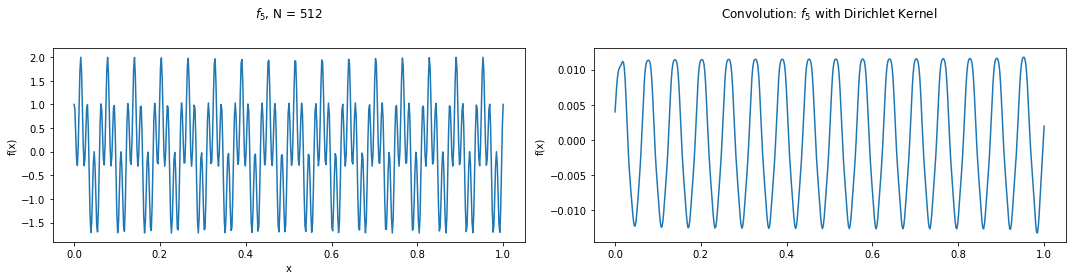

In [3]:
# Define the function f_5
def func_5(x):
    return np.sin(32 * np.pi * x) + np.cos(128 * np.pi * x)

# Define the de-la-Vallée-Poussin function
def de_la_vallee_poussin(x, n, m):
    """
    de-la-Vallée-Poussin function
    
    Parameters:
    x - the x values (input array)
    n - parameter n, where n >= m
    m - parameter m for the de-la-Vallée-Poussin function
    
    Returns:
    A computed array based on the de-la-Vallée-Poussin formula
    """
    
    d_sum = np.zeros_like(x)
    
    # First summation
    for i in range(1, n - m + 1):
        d_sum += np.cos(2 * np.pi * i * x)
        
    # Second summation
    for i in range(n - m + 1, n + m):
        d_sum += (m + n - i) / (2 * m) * np.cos(2 * np.pi * i * x)
    
    return (1 / (2 * n)) * (1 + 2 * d_sum)


N = 512
x_vals = np.linspace(0, 1, N)

# Generate f5 samples
f5_values = func_5(x_vals)
f5_fft = scipy.fft.fft(f5_values, norm="forward")  # Normalize by N
V_fft = scipy.fft.fft(de_la_vallee_poussin(x_vals, 48, 1))

# Convolution in the Fourier domain
conv_result = scipy.fft.ifft(f5_fft * V_fft)
# Extract the real part of the result
conv_real = np.real(conv_result)

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(x_vals, f5_values.real)
plt.title(f"$f_5$, N = 512", pad=30)
plt.xlabel('x')
plt.ylabel('f(x)')
    
plt.subplot(1, 2, 2)
plt.plot(x_vals, conv_real)
plt.title("Convolution: $f_5$ with Dirichlet Kernel", pad=30)
plt.ylabel('f(x)')

plt.tight_layout()
plt.show()

We observe that after the convulution (to the right), we just have the sine-functions left, because the cosine-functions are filtered. This happens beacuse of the frequency of the functions. The frequency of the sine-functions are less than $n=48$, but the frequency of cosine-functions is bigger than $n$. 

Here, we try with different $m$-values, and compares:

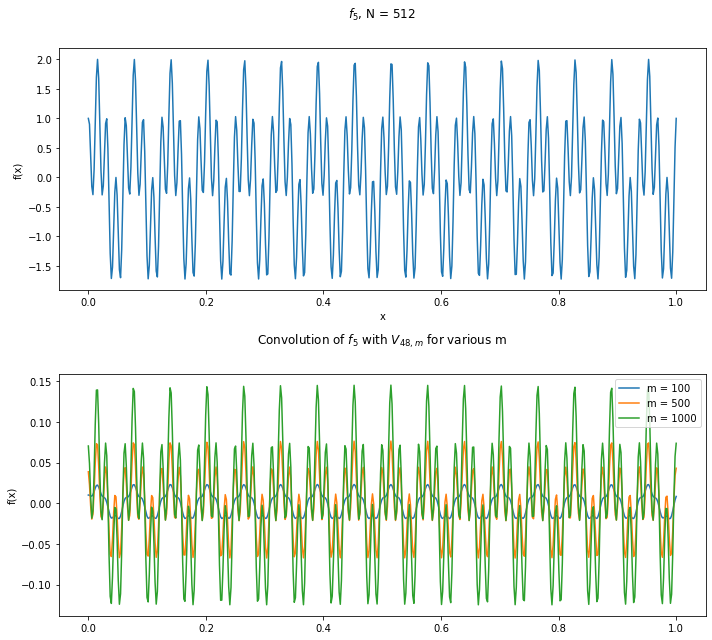

In [113]:
N = 512
x_vals = np.linspace(0, 1, N)

# Generate f5 samples
f5_values = func_f5(x_vals)
f5_fft = scipy.fft.fft(f5_values)

# List of different m values
m_values = [100, 500, 1000]

plt.figure(figsize=(10, 9))

plt.subplot(2, 1, 1)
plt.plot(x_vals, f5_values.real)
plt.title(f"$f_5$, N = 512", pad=30)
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot the convolution results for different values of m
plt.subplot(2, 1, 2)
for m in m_values:

    V_fft = scipy.fft.fft(de_la_vallee_poussin(x_vals, 48, m))
    
    # Convolution in the Fourier domain and normalize by N
    convolution = scipy.fft.ifft(f5_fft * V_fft) / N
    
    c_real = np.real(convolution)
    
    plt.plot(x_vals, c_real, label=f'm = {m}')

plt.title("Convolution of $f_5$ with $V_{48,m}$ for various m", pad=30)
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()

For gradually increasing $m$, we observe that the plots before and after the convolution become more similar. For $m=1000$, the plots before and after the convolution are fairly similar. The pattern or trend remains the same, but the amplitude is significantly smaller after the convolution. Thus, for larger 
$m$, the cosine functions are not filtered out.

## e)

Performing the convolution of the signal from $\texttt{project1-signal-data.csv}$ with two distinct kernels:

De-la-Vallée-Poussin kernel (in its sampled/discretized form) $ V_{92, 10} $, and the kernel $ \vec{h} = (-1, 2, -1, 0, \dots, 0)^T \in \mathbb{R}^N $, where $ N $ represents the length of the signal from the file.

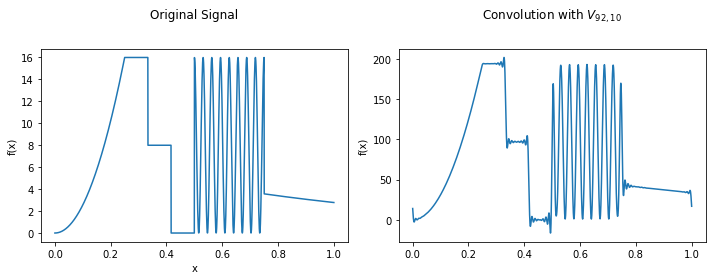

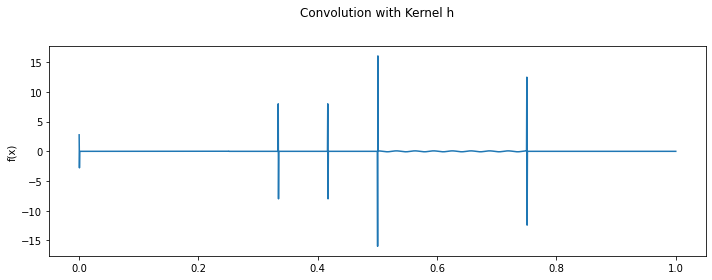

In [73]:
data = np.genfromtxt('project1-signal-data.csv', delimiter=',', skip_header=1)
x_values = data.T[0]
signal_values = data.T[1]

N = len(x_values)

# Calculate the FFT of the signal and kernel
V_fft = scipy.fft.fft(de_la_vallee_poussin(x_values, 92, 10))  # Using n=92, m=10
signal_fft = scipy.fft.fft(signal_values)

convolution_V = scipy.fft.ifft(signal_fft * V_fft)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x_values, signal_values)
plt.title("Original Signal", pad=30)
plt.xlabel("x")
plt.ylabel("f(x)")

plt.subplot(1, 2, 2)
plt.plot(x_values, convolution_V.real)
plt.title("Convolution with $V_{92,10}$", pad=30)
plt.ylabel("f(x)")

plt.tight_layout()
plt.show()

# Define kernel h function
def generate_kernel_h(N):
    """
    Generate the kernel h.
    
    Parameters:
    N - the size of the kernel
    
    Returns:
    h - the kernel h as a list [-1, 2, -1, 0, ..., 0]
    """
    h_kernel = [-1, 2, -1] + [0] * (N - 3)
    
    return h_kernel


h_kernel_values = generate_kernel_h(N)
h_fft = scipy.fft.fft(h_kernel_values)

convolution_h = scipy.fft.ifft(signal_fft * h_fft)

plt.figure(figsize=(10, 4))
plt.plot(x_values, convolution_h.real)
plt.title("Convolution with Kernel h", pad=30)
plt.ylabel("f(x)")

plt.tight_layout()
plt.show()

We observe that the de-la-Vallée-Poussin kernel $V_{92,10}$ smooths out the edges of the signal, and making it continuous. However, the vector $\vec{h}$ highlights the abrupt jumps in the signal, capturing the most significant changes. For instance, when the signal oscillates between $0.5$ and $0.7$, these fluctuations are not considered as important changes.

### Task 3: Sound Processing

## a)

Implementing a sine function that produces the concert pitch (“Kammertonen”) of 440 Hz. Sampling this function with 44.1 kHz over a time period of 3.

In [109]:
sampling_rate = 44100  # Sampling rate [Hz]
duration = 3  # Duration [s]
f = 440  # Frequency [Hz]

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)


def sineWave(f, t):
    """
    Sine function
    A * sin(2 * pi * frequency * time)
    A - amplitude, set to 1 for simplicity
    
    Input:
    f - frequency [Hz]
    t - time [s]
    
    Output:
    sin(2 * pi * f * t) - sine wave
    """
    return np.sin(2 * np.pi * f * t)

concertpitch = sineWave(f,t)

Play the concertpitch using sounddevice:

In [3]:
# Play the concertpitch with the sampling rate
sd.play(concertpitch, samplerate=sampling_rate)

# Wait for the sound to finish playing
sd.wait()

Plotting its spectrum:

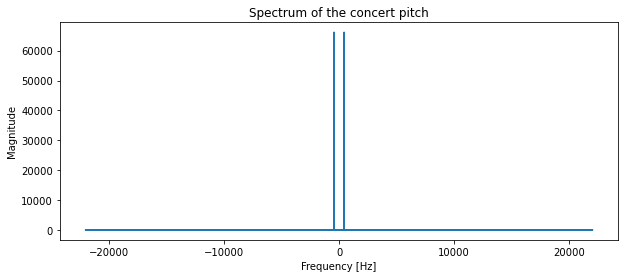

In [10]:
# Apply FFT
fft_result = np.fft.fft(concertpitch)
fft_freqs = np.fft.fftfreq(len(fft_result), 1/sampling_rate)
fft_magnitude = np.abs(fft_result)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs, fft_magnitude)
plt.title("Spectrum of the concert pitch")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

We can see that the primary peak is located at both 440 Hz and its negative counterpart (-440 Hz).

The length of the signal is the duration of the signal, which is 3 seconds.

However, the length of the signal in terms of the number of samples, is the total number of data points, which is the product of the sampling rate and the duration.
$$ length = 44100 Hz * 3 s = 132 300 Hz s $$

## b)

 Plotting the spectrum using FFT:

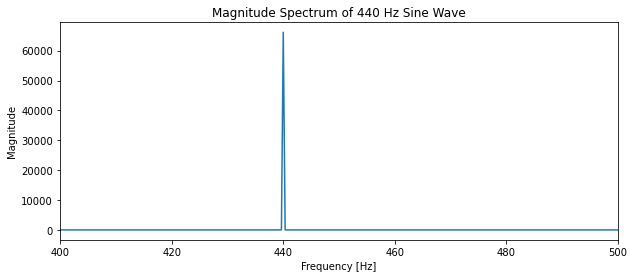

In [42]:
# Apply FFT
fft_result = np.fft.fft(concertpitch)
fft_freqs = np.fft.fftfreq(len(fft_result), 1/sampling_rate)
fft_magnitude = np.abs(fft_result)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(fft_freqs[:len(fft_freqs)//2], fft_magnitude[:len(fft_magnitude)//2])
plt.title('Magnitude Spectrum of 440 Hz Sine Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(400, 500)
plt.show()

As we can see from the plot, the dominating frequency is clearly 440 Hz. Sound, which represents pressure variations in air (or other media), does not have a physical "negative" frequency. Therefore, we only focus on the positive value.

## c)

We are required to take the $\texttt{music.flac}$ file and increase the speed by a factor of 2 without changing the pitch. To do that, we define a function $\texttt{increaseSpeed()}$ which takes the signal as an array and the increasing factor as input parameters.

The reason we cannot simply double the sample rate and be done is that it would also increase the pitch. Therefore, we need to use the Fourier transform to move to the frequency domain, where we can manipulate the frequency without changing the pitch.

To do this, the function is starting to divide the signal into several overlapping windows. The windows overlap by 75\%, ensuring that the frames can be smoothly combined when reassembling the signal. These windows are analyzed and their speed is adjusted one at a time.

In the Fourier domain, the magnitude and phase of each window are extracted. We adjust the phase to time-stretch the current window by comparing the phases to the ones from the previous window.

The expected change when the signal is shifted in time is also taken into account, both with respect to the original $\texttt{hop\_size}$ and our new $\texttt{hop\_size}$, which is modified according to the stretch factor:

$$
\text{Expected phase shift} = \frac{\text{hop\_size} \cdot 2 \pi k}{\text{window\_size}}
$$

Here, $k$ refers to the frequency bin index. We also apply this calculation to the $\texttt{new\_hop\_size}$. A modulo function is used to maintain phase continuity within the interval $[- \pi, \pi]$. Finally, the calculated phase shifts are applied to reconstruct the time-domain signal with the adjusted speed.

**Algorithm Steps:**

**1)** Divide the input signal into overlapping windows. 
     
**2)** Apply Fourier Transform (FFT) on each window to obtain the frequency spectrum.
    
**3)** Calculate the magnitude and phase of each frequency component. 
    
**4)** Adjust the phase based on the stretch factor to ensure smooth transitions between windows.
     
**5)** Convert the modified frequency components back to the time domain using inverse FFT (IFFT).
     
**6)** Overlap and add the windows to produce the final time-stretched signal.
    
**7)** Normalize the output to prevent clipping. After processing, the signal may have amplitudes that exceed the allowable range.

In [10]:
def increaseSpeed(data, factor):
    
    """
    Time-Stretching Function

    Input:
    data - the input audio signal (numpy array)
    factor - the time-stretch factor

    Output:
    result - the time-stretched signal (numpy array)

    """
    
    # Step 1: Divide the input signal into overlapping windows
    win_size=1024
    hop_size = win_size // 4
        
    # Calculate the new hop size based on the stretch factor
    new_hop_size = int(hop_size/factor)
    
    # Create window
    window = np.ones(win_size)

    # Prepare an array to hold the final output signal
    num_windows = int((len(data) - win_size) / hop_size)
    
    # Make arrays for results
    result = np.zeros(int(len(data) / factor) + win_size)

    # Arrays to keep track of phase information
    phase_cumulative = np.zeros(win_size) # Cumulative phase of each window
    previous_phase = np.zeros(win_size) # Previous phase to calculate phase difference
    total_phase = np.zeros(win_size) # The total phase

    # Loop through each window of the signal
    for i in range(num_windows):
        start = i * hop_size
        end = start + win_size
        # Apply the window to the current frame
        current_frame = data[start:end] * window

        # Step 2: Apply the Fourier Transform (FFT) to convert the current window to the frequency domain
        spectrum = np.fft.fft(current_frame)

        # Step 3: Calculate magnitude and phase of the spectrume
        magnitude = np.abs(spectrum)
        #phase = np.angle(spectrum)
        phase = np.arctan2(spectrum.imag, spectrum.real)

        # Step 4: Calculate phase difference and adjust phase for stretching
        delta_phase = phase - previous_phase  # Phase difference between this window and the previous one
        previous_phase = phase.copy()  # Store the current phase for the next window
        
        # Step 4: Phase unwrapping and adjusting for new hop size
        delta_phase -= hop_size * 2 * np.pi * np.arange(win_size) / win_size
        delta_phase = np.mod(delta_phase + np.pi, 2 * np.pi) - np.pi
        
        # Step 4: Accumulate total phase with new hop size adjustment
        total_phase += new_hop_size * 2 * np.pi * np.arange(win_size) / win_size + delta_phase
        
        # Step 5: Reconstruct the modified spectrum with adjusted phase
        new_spectrum = magnitude * np.exp(1j * total_phase)
 
        # Step 5: Apply inverse FFT to convert back to the time domain
        frame_timedomain = np.real(np.fft.ifft(new_spectrum)) * window

        # Step 6: Overlap and add - place the frame in the final output array
        new_start = int(i * new_hop_size)
        new_end = new_start + win_size
        result[new_start:new_end] += frame_timedomain

    # Step 7: Normalize the result to prevent clipping
    result = result / np.max(np.abs(result))
    return result

audio_data, sample_rate = sf.read('music.flac')

# Since the audio is stereo, convert it to mono by averaging channels
audio_data = np.mean(audio_data, axis=1)

speed_factor = 2.0

stretched_audio = increaseSpeed(audio_data, speed_factor)

sd.play(stretched_audio, samplerate=sample_rate)
sd.wait()

The speed is now increased by a factor of 2. This can be confirmed as the duration of the audio clip is half of the original. Furthermore, we plot the frequency spectrum, both before and after, to check if the pitch has changed.

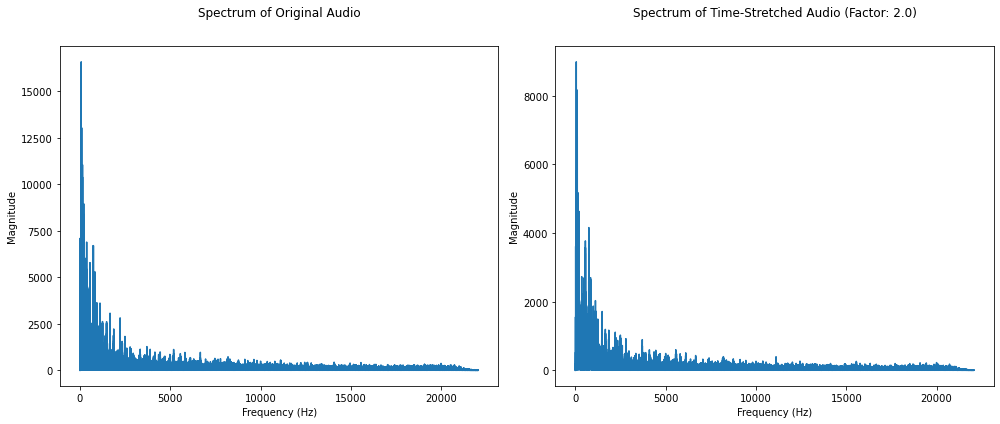

In [15]:
plt.figure(figsize=(14, 6))

fft_original = scipy.fft.fft(audio_data)
frequencies = scipy.fft.fftfreq(len(audio_data), d=1/sample_rate)

plt.subplot(1, 2, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_original[:len(frequencies)//2]))
plt.title("Spectrum of Original Audio", pad = 30)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

fft_stretched = scipy.fft.fft(stretched_audio)
frequencies_stretched = scipy.fft.fftfreq(len(stretched_audio), d=1/sample_rate)

plt.subplot(1, 2, 2)
plt.plot(frequencies_stretched[:len(frequencies_stretched)//2], np.abs(fft_stretched[:len(frequencies_stretched)//2]))
plt.title(f"Spectrum of Time-Stretched Audio (Factor: {speed_factor})", pad = 30)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

We can see that the distribution of frequencies is quite similar before and after, indicating that the pitch is more or less unchanged.

We observe on the y-axis that the magnitude has generally become much lower, which could be due to the signal’s energy is distributed over a larger number of samples. We can also see that the magnitude has changed in some of the "peaks," which is due to the same reason. However, the peaks remain in the same position, meaning that the sound at the same frequency is still prominent.
Although the magnitude has changed, this will not affect the pitch. Pitch is determined by the frequency of the sound waves, while amplitude affects the loudness or volume.

This algorithm can certainly be improved, such as by using Hanning windows. Hanning windows could reduce artifacts that can occur when reconstructing signals in overlapping segments, caused of their shape:

$$
w(n) = 0.5 - 0.5 \cos \left( \frac{2\pi n}{N-1} \right), \quad 0 \leq n \leq N-1
$$

The windows we have used, however, have a rectangular shape, which is defined as:

$$
w(n) = 1, \quad 0 \leq n \leq N-1
$$

## d)

To increase the tone height by an octave without increasing the speed, we can use the algorithm from part **c)**. We know that if we manage to double the frequency, we raise the pitch by one octave. This can be done by doubling the sampling rate.

By using the function $\texttt{increaseSpeed(data, 0.5)}$, the audio is time-stretched by a factor of $0.5$ without changing the frequencies. If we then play it back at double the sample rate $\texttt{(sample\_rate * 2)}$, the audio will return to its original length, and the frequencies are now doubled.

In [17]:
data, sample_rate = sf.read('music.flac')

# Since the audio is stereo, convert it to mono by averaging channels
audio_data = np.mean(data, axis=1)

stretched_audio = increaseSpeed(audio_data, 0.5)
sd.play(stretched_audio, sample_rate * 2)

The pitch of the audio is increased by one octave, but the playback speed is unchanged.

## e)

Want to transmit the music.flac file to an underwater robot via a very slow connection while reducing the data rate. The goal is to reduce the number of samples per second from 44 100 samples per second to 22 050 samples per second. Furthermore, neither the pitch nor the speed of the audio should change during this process.

The function $\texttt{downsample\_audio}$ reduces the sampling rate as requested. The $\texttt{decimation\_factor}$ is calculated as the ratio between the original sampling rate and the target rate $\frac{44100}{22050} = 2$. Then, the line $\texttt{downsampled\_data = data[::decimation\_factor]}$ selects every 2nd sample from the original data, reducing the sampling rate by a factor of 2. By reducing the sample rate, we are removing certain data points.

In [19]:
data, samplerate = sf.read('music.flac')

# Function to downsample the audio signal
def downsample_audio(data, original_rate, target_rate):
    decimation_factor = original_rate // target_rate
    downsampled_data = data[::decimation_factor] # Downsample the signal by taking every n-th sample
    
    return downsampled_data

target_rate_22050 = 22050
data_22050 = downsample_audio(data, samplerate, target_rate_22050)
sd.play(data_22050, samplerate=target_rate_22050)
sd.wait()

The audio file is now resampled from 44 100 Hz to 20 050 Hz. Both the pitch and speed are not dependent on the sampling rate, so they remain unchanged. However, there will be a reduction in the audio quality, as some of the data is lost.

To analyze the effect of reducing the sampling rate even further, we'll reduce the sampling rate of the audio file to 11 025 Hz and then to 5 012 Hz and examine how this affects the audio quality.

In [20]:
target_rate_11025 = 11025
data_11025 = downsample_audio(data, samplerate, target_rate_11025)
sd.play(data_11025, samplerate=target_rate_11025)
sd.wait()

Notice at 11 025 Hz that the quality is further reduced, almost as if it's being played from an old radio. Can hear some occasional crackling.

In [21]:
target_rate_5012 = 5012
data_5012 = downsample_audio(data, samplerate, target_rate_5012)
sd.play(data_5012, samplerate=target_rate_5012)
sd.wait()

At 5012 Hz the audio quality degrades noticeably. High-frequency content is to a certain extent lost, because higher frequencies require a higher sampling rate to be accurately represented. The sound is now muffled and less detailed.

## f)

Here, we want to load the noisy.flac file, play it, and find the sample rate. Then, we want to compare the sample rate of this file with previous observations.

In [12]:
filename = 'noisy.flac'
data, samplerate = sf.read(filename)

sd.play(data, samplerate)
sd.wait()

print(f"Sample rate of the audio: {samplerate} Hz")

Sample rate of the audio: 16000 Hz


The quality of the noisy audio file is significantly worse than the previous audio file. Here, the sample rate is 16 000 Hz, and it is not possible to understand what is being said, in addition it is disturbing background noise. There was no speech in the previous audio file, which may explain the differences, but the distinctive melody was recognizable even when the sample rate was reduced down to 5 012 Hz.

## g)

We are required to remove noise (denoise) from noisy.flac by analyzing its spectrum and applying a suitable filter. This process will involve investigating the noise in the signal, using filter like the de la Vallée-Poussin mean.

Starting by comparing the spectrum of noisy.flac and comparison.flac (which is the same audio file, just modified so that you can hear what is being said). That way, we can know what should be filtered out.

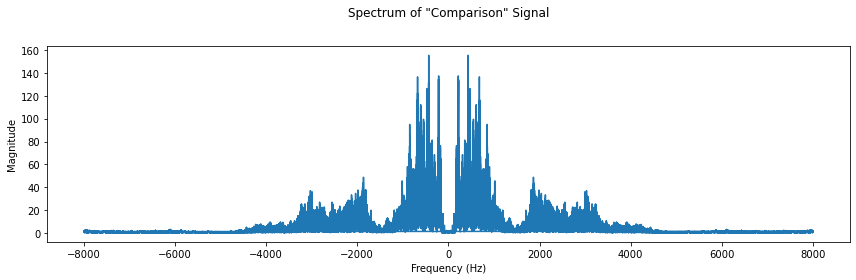

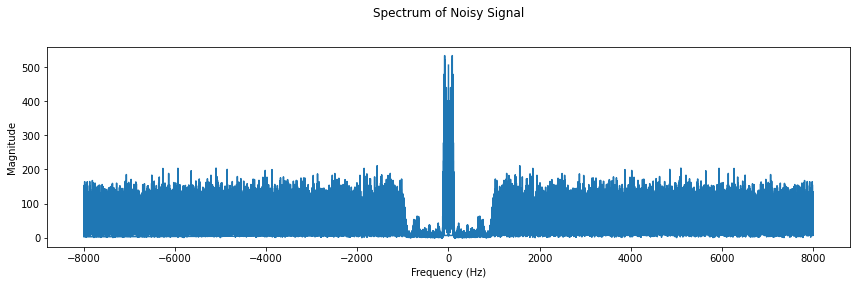

In [48]:
data, samplerate = sf.read('comparison.flac') 

spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1/samplerate)

plt.figure(figsize=(12, 4))

plt.plot(frequencies, np.abs(spectrum))

plt.title('Spectrum of "Comparison" Signal', pad = 30)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

filename = 'noisy.flac'
data, samplerate = sf.read(filename)

spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1/samplerate)

plt.figure(figsize=(12, 7))

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(spectrum))
plt.title('Spectrum of Noisy Signal', pad = 30)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

We can clearly see differences in the spectrum. Comparison.flac shows activity from approximately 100 to 5000 Hz. The noisy signal, however, contains a lot of noise starting from 1000 Hz and above, and around 0. Additionally, the magnitude on the y-axis is significantly higher in the noisy signal, which suggests that the frequencies with lower magnitude in this plot (around 100 to 1000 Hz) likely correspond to the voice we want to extract. This range also aligns well with the spectrum of Comparison.flac.

Next, we will try to find suitable values for $n$ and $m$ in the de-la-Vallée-Poussin filter to remove noise above 1000 Hz. $n$ determines the "width" of the filter, while $m$ controls how "steep" the vertical lines in the filter will be. Some frequencies from the voice may also be removed, as Comparison.flac has activity in this range as well. However, since the noise is dominant, we will prioritize filtering it out.

Here, we need to scale the de-la-Vallée-Poussin filter to make it easier to compare with the spectrum of noisy.flac. We will plot both in the same figure for comparison.

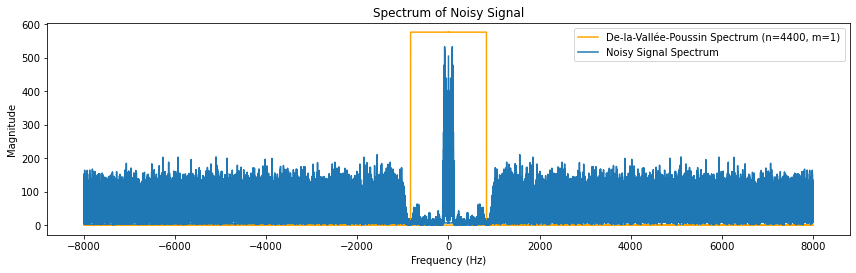

In [49]:
filename = 'noisy.flac'
data, samplerate = sf.read(filename)

spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1/samplerate)

# de-la-Vallée-Poussin function
n, m = 4400, 1
x_values = np.linspace(0, 1, len(data), endpoint=False)  # Normalized x values in [0, 1)

# Compute the de-la-Vallée-Poussin mean for these values
v_poussin_mean = de_la_vallee_poussin(x_values, n, m) 

# Perform the Fourier transform on the de-la-Vallée-Poussin mean
v_poussin_spectrum = np.fft.fft(v_poussin_mean)

plt.figure(figsize=(12, 7))

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(v_poussin_spectrum)*60, label='De-la-Vallée-Poussin Spectrum (n=4400, m=1)', color='orange')
plt.plot(frequencies, np.abs(spectrum), label='Noisy Signal Spectrum')
plt.title('Spectrum of Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.show()

It seems that using $n=4400$ and $m=1$ for the de-la-Vallée-Poussin filter can effectively filter out the desired noise. We will try that, and plot the spectrum before and after applying the filter.

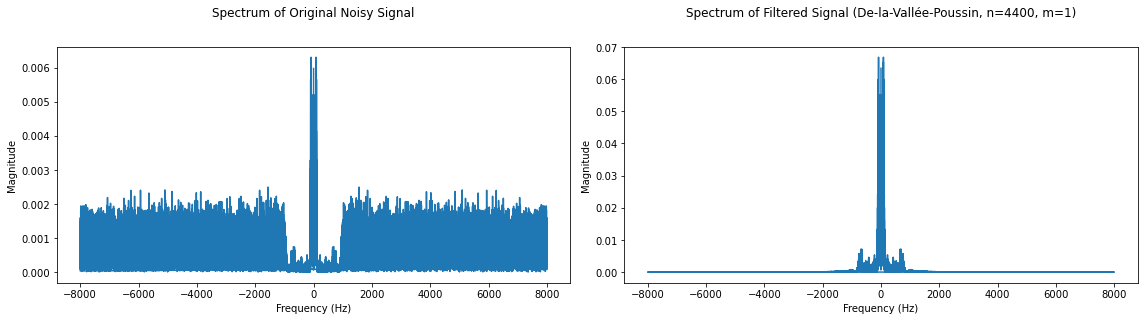

In [72]:
data, samplerate = sf.read('noisy.flac')

N = len(data)
x = np.linspace(0, 1, N)

noisy_FFT = scipy.fft.fft(data, norm = "forward")

V_FFT_4400 = scipy.fft.fft(de_la_vallee_poussin(x, 4400, 1))

convolution = scipy.fft.ifft(noisy_FFT * V_FFT_4400)

filtered_signal_1 = np.real(convolution)

filtered_spectrum = np.fft.fft(filtered_signal_1)
frequencies = np.fft.fftfreq(N, 1/samplerate)

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 3)
plt.plot(frequencies, np.abs(noisy_FFT))
plt.title("Spectrum of Original Noisy Signal", pad = 30)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 2, 4)
plt.plot(frequencies, np.abs(filtered_spectrum))
plt.title("Spectrum of Filtered Signal (De-la-Vallée-Poussin, n=4400, m=1)", pad = 30)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

We can see that the desired noise has been removed, and we can also hear that the audio has less noise. Therefore, the filter is successful. Next, we aim to remove the noise in the middle of the spectrum (around 0) and will try to find suitable values for $n$ and $m$ in the same way.

To achieve this, we need to create the "opposite" of the de-la-Vallée-Poussin filter because we want to remove noise centered around 0 while keeping the frequencies on the sides. With the "opposite" filter, it will be 0 where it is currently high, and high where it is currently 0.

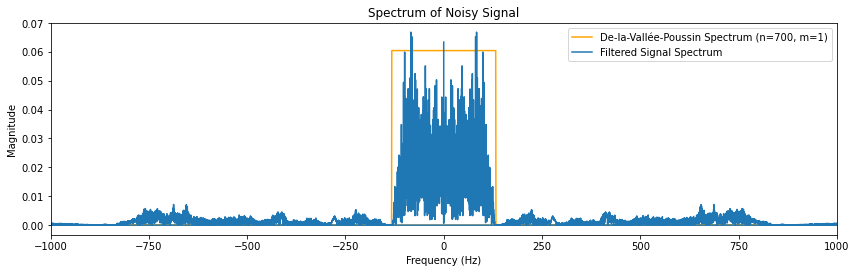

In [71]:
filename = 'noisy.flac'
data, samplerate = sf.read(filename)

n, m = 700, 1
x_values = np.linspace(0, 1, len(data), endpoint=False)

v_poussin_mean = de_la_vallee_poussin(x_values, n, m)

# Trying to make the "opposite" filter
# v_poussin_mean = np.max(v_poussin_mean) - v_poussin_mean

v_poussin_spectrum = np.fft.fft(v_poussin_mean)

plt.figure(figsize=(12, 7))

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(v_poussin_spectrum)/1000, label='De-la-Vallée-Poussin Spectrum (n=700, m=1)', color='orange')
plt.plot(frequencies, np.abs(filtered_spectrum), label="Filtered Signal Spectrum")
plt.title("Spectrum of Noisy Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim([-1000, 1000])
plt.legend()

plt.tight_layout()
plt.show()

Here, $n = 700$, $m = 1$ seems to fit very well.

The "opposite" filter unfortunately did not work, even though it theoretically should have. As you can see, the attempt to create the filter is commented out in the code. If we had managed to create the filter and then applied it to the sound that had already gone through the first filtering, the noise around 0 would have been removed. We would have achieved a sound with even less noise, and hopefully been able to hear what was being said.